# Question 1. Load the Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [3]:
import tensorflow as tf
tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)
import tensorflow as tf

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Check the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Now x_train, y_train, x_test, and y_test are ready to be used


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [4]:
import numpy as np
y_train_flat =y_train.flatten()
unique_labels = np.unique(y_train_flat)
num_unique_labels = len(unique_labels)

print("Unique labels:", unique_labels)
print("Number of unique labels:", num_unique_labels)

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Number of unique labels: 100


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

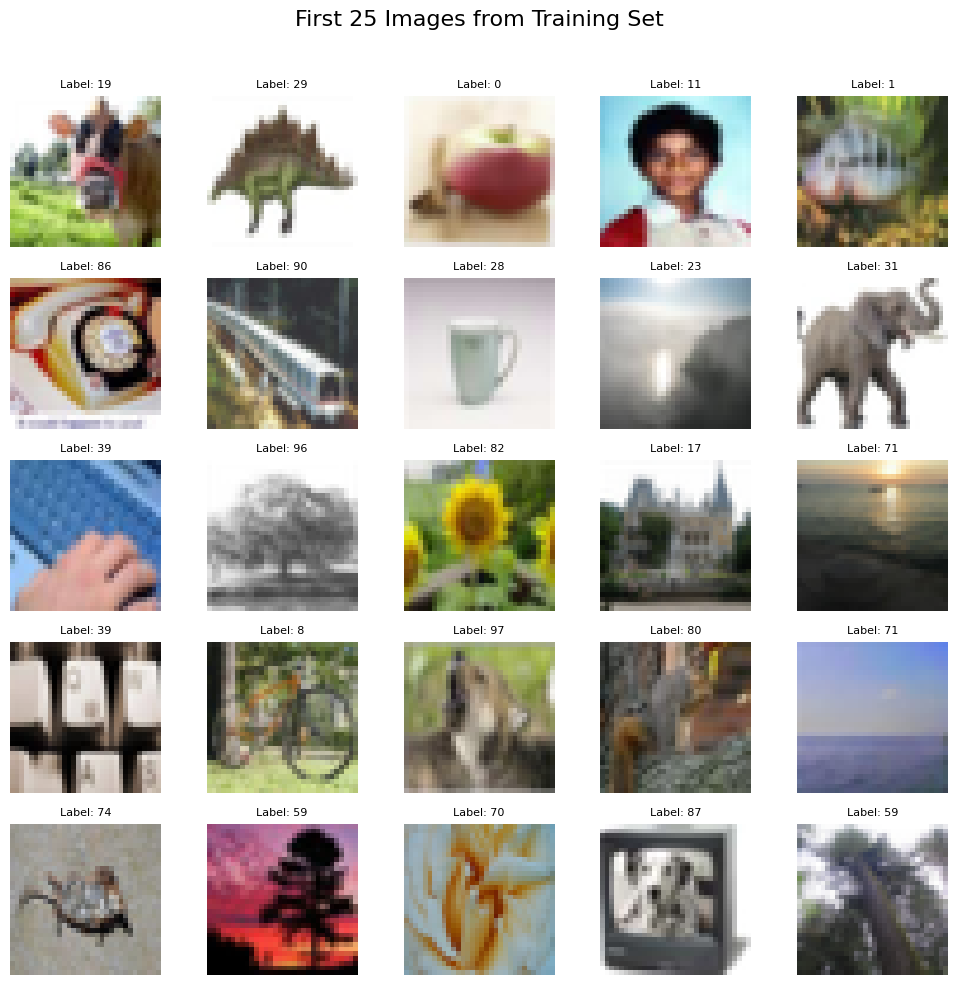

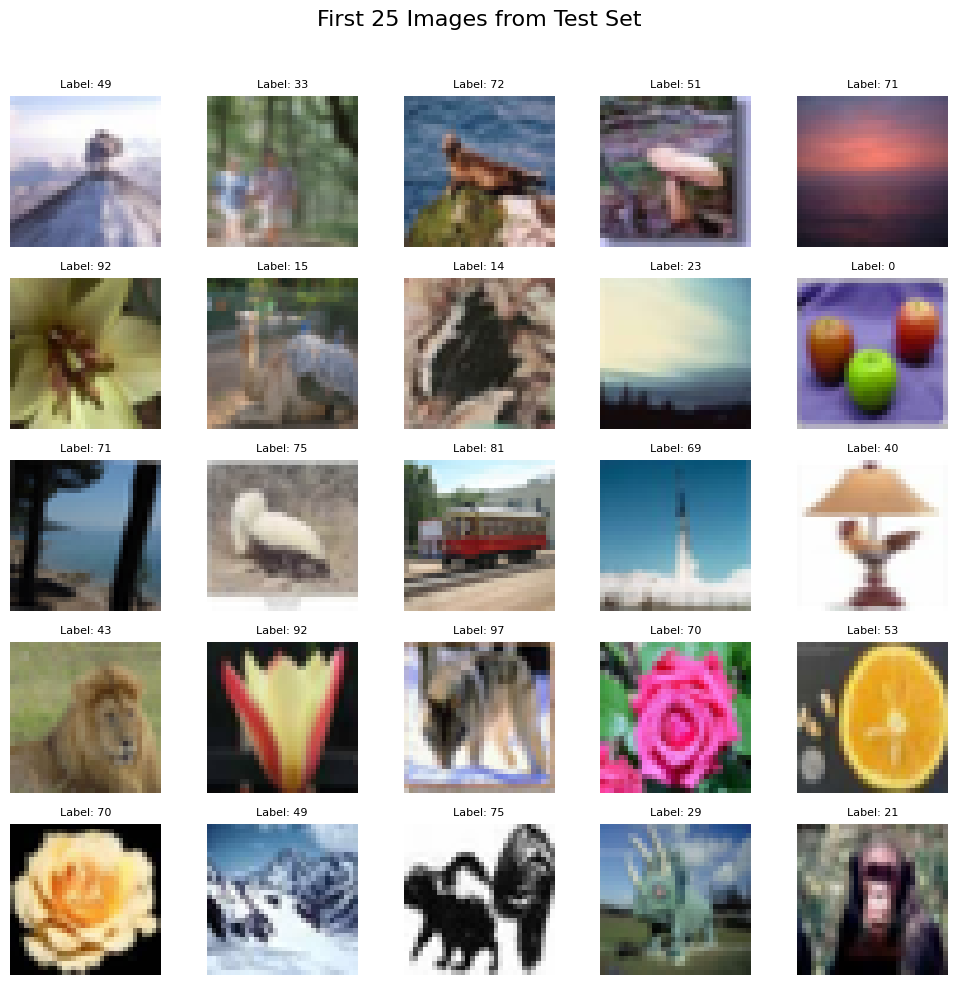

In [8]:
import matplotlib.pyplot as plt
# Define a function to plot images
def plot_images(images, labels, title, num_images=25):
    # Create a figure with 5x5 subplots
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i][0]}', fontsize=8)
        ax.axis('off')  # Hide axes

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Plot the first 25 images from the training set
plot_images(x_train[:25], y_train[:25], 'First 25 Images from Training Set')

# Plot the first 25 images from the test set
plot_images(x_test[:25], y_test[:25], 'First 25 Images from Test Set')

4. Normalize the data

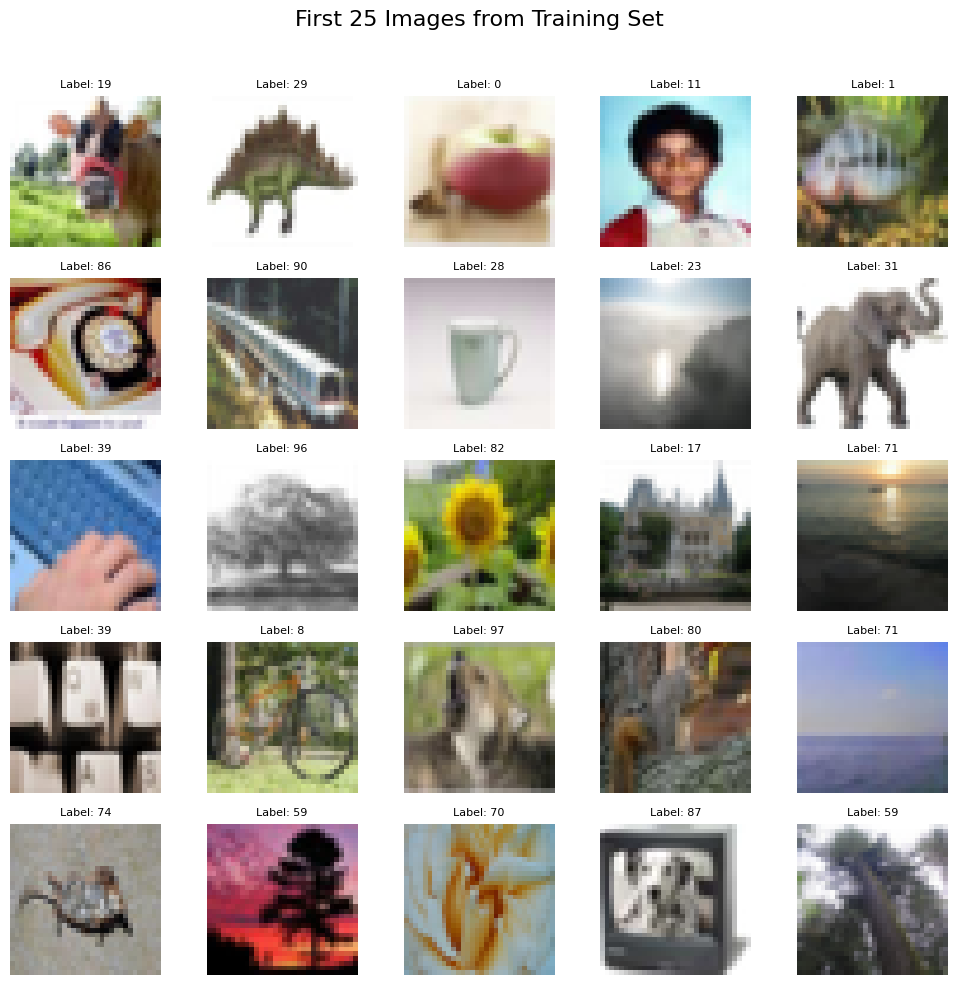

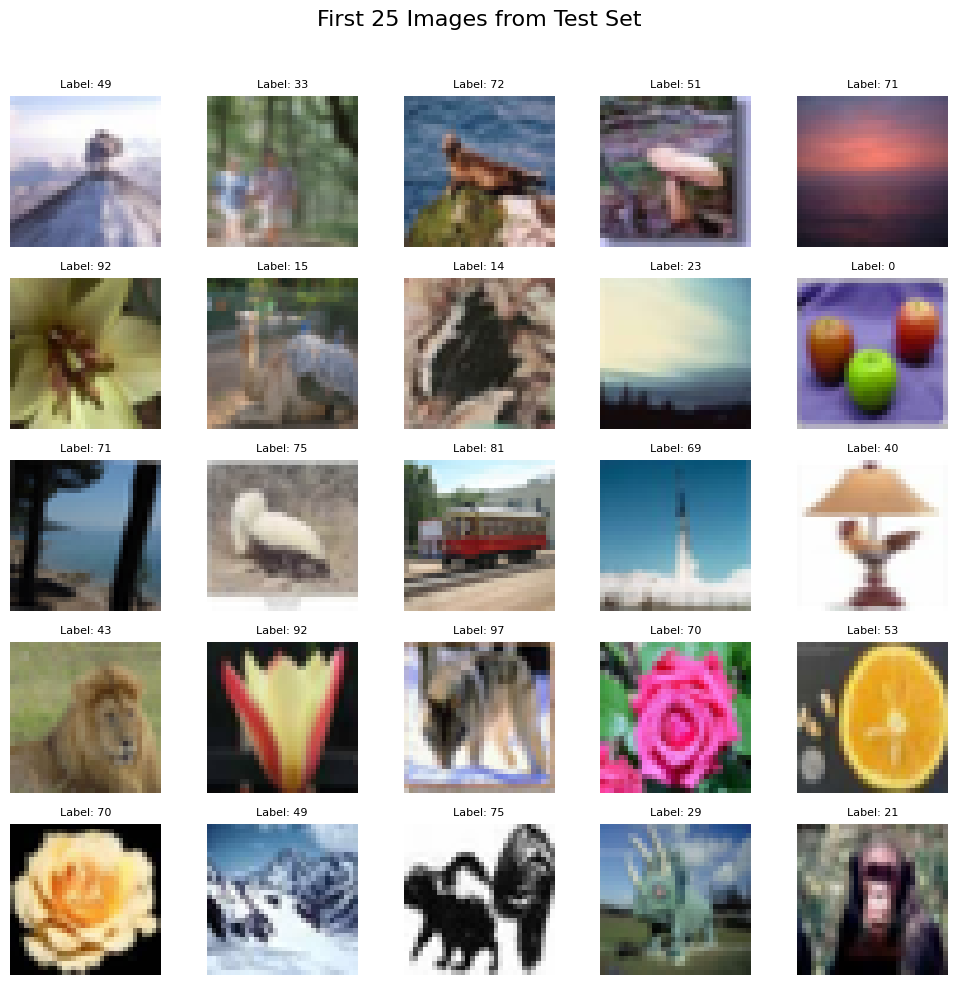

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define a function to plot images
def plot_images(images, labels, title, num_images=25):
    # Create a figure with 5x5 subplots
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i][0]}', fontsize=8)
        ax.axis('off')  # Hide axes

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Plot the first 25 images from the training set
plot_images(x_train[:25], y_train[:25], 'First 25 Images from Training Set')

# Plot the first 25 images from the test set
plot_images(x_test[:25], y_test[:25], 'First 25 Images from Test Set')


It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.0185 - loss: 4.8013 - val_accuracy: 0.0366 - val_loss: 4.2663
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.0518 - loss: 4.0883 - val_accuracy: 0.0638 - val_loss: 4.0916
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.0971 - loss: 3.7389 - val_accuracy: 0.1248 - val_loss: 3.6886
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.1639 - loss: 3.3390 - val_accuracy: 0.2046 - val_loss: 3.1051
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.2429 - loss: 2.9046 - val_accuracy: 0.2342 - val_loss: 3.1147
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.3063 - loss: 2.5748 - val_accuracy: 0.3068 - val_loss: 2.6426
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.3673 - loss: 2.2935 - val_accuracy: 0.3106 - val_loss: 2.6218
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.4178 - loss: 2.0784 - 

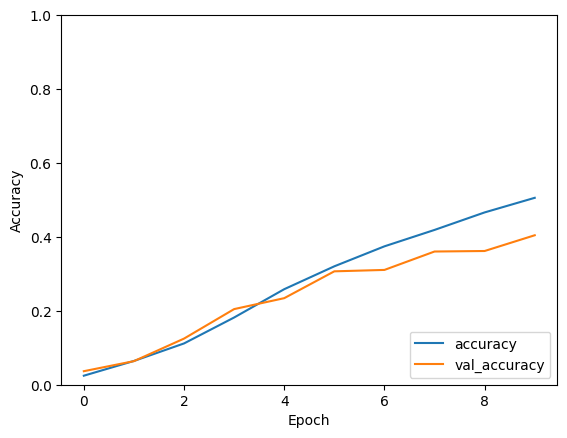

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_vgg16_model(input_shape=(32, 32, 3), num_classes=100):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
model = build_vgg16_model(input_shape=(32, 32, 3), num_classes=100)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

313/313 [==============================] - 60s 7ms/step - loss: 1.5216 - accuracy: 0.5635


[1.5216360092163086, 0.5634999871253967]